In [1]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Preparations for Adaboost Method

#### parameters for adaboost 
The adaboost contains 3 params:
* base_estimator: Default——Desition Tree Model
* n_estimators: training times
* learning_rate: set the weight

## Preparations for Decision Trees


####  Parameters for Decision Trees
```
DecisionTreeClassifier(criterion="gini",
                 splitter="best",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features=None,
                 random_state=None,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 class_weight=None,
                 presort=False)
```

##### Meanings:
1. criterion:string, optional (default="gini")
            (1).criterion='gini',
            (2).criterion='entropy'

2. max_depth:int or None, optional (default=None)

3. splitter:string, optional (default="best")。ways to make the split
           (1).splitter='best',
           (2).splitter='random',

4. min_samples_split:int, float, optional (default=2)
           (1).int type: samples
           (2).float type: ratio

5. min_samples_leaf: int, float, optional (default=1)
           (1).int type: samples
           (2).float type: ratio

6. min_weight_fraction_leaf:float, optional (default=0.)

7. max_features:int, float, string or None, optional (default=None).
           (1).int type: samples
           (2).float type: ratio
           (3).'auto'/'sqrt',sqrt(n_features)
           (4).'log2':log2(n_features)
           (5).None: n_features

8. random_state:int, RandomState instance or None, optional (default=None)
           (1).int: specific random seed generator
           (2).RandomState: specific random seed generator
           (3).None: default random seed generator

9. max_leaf_nodes: int or None, optional (default=None)。
           (1).None : DO NOT consider the number
           (2).int type: DO NOT consider max_depth。
10. min_impurity_decrease:float, optional (default=0.)

11. class_weight:dict, list of dicts, "balanced" or None, default=None
         (1).default: 1
         (2).class_weight='balanced': n_samples / (n_classes * np.bincount(y))

13. presort:bool, optional (default=False)
        

In [3]:
# Load data
data = pd.read_csv('car.data',names=['buying','maint','doors','persons','lug_boot','safety','quality'])
data

,buying,maint,doors,persons,lug_boot,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
feature_names = data.columns.drop(['quality'])
class_names = data.quality.unique()
print(feature_names)
print(class_names)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
['unacc' 'acc' 'vgood' 'good']


In [5]:
#change the string type into int type to make the dataset more numberial

data['buying'] = pd.Categorical(data['buying'],['low','med','high','vhigh'])
data['maint'] = pd.Categorical(data['maint'],['low','med','high','vhigh'])
data['doors'] = pd.Categorical(data['doors'],['2','3','4','5more'])
data['persons'] = pd.Categorical(data['persons'],['2','4','more'])
data['lug_boot'] = pd.Categorical(data['lug_boot'],['small','med','big'])
data['safety'] = pd.Categorical(data['safety'],['low','med','high'])
data['quality'] = pd.Categorical(data['quality'],['unacc','acc','good','vgood'])
data['buying'] = data['buying'].cat.rename_categories([1,2,3,4])
data['maint'] = data['maint'].cat.rename_categories([1,2,3,4])
data['doors'] = data['doors'].cat.rename_categories([2,3,4,5])
data['persons'] = data['persons'].cat.rename_categories([2,4,6])
data['lug_boot'] = data['lug_boot'].cat.rename_categories([1,2,3])
data['safety'] = data['safety'].cat.rename_categories([1,2,3])
data['quality'] = data['quality'].cat.rename_categories([1,2,3,4])
# the results
data.head()

,buying,maint,doors,persons,lug_boot,safety,quality
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


### Only use the DecisionTreeClassifier

In [6]:
# Get the original X and y
X = data.drop(['quality'],axis=1).values
y = data.quality

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [8]:
# set the premeters for decisition trees
param_grid= {'criterion':['gini'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf':[2,3,5,10],
             'max_leaf_nodes':[3,4,5,6,7,8,9,10]
            }

In [9]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=6)
grid.fit(X_train,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 

In [10]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 2}


In [11]:
clf = grid.best_estimator_

#Predict the response for test dataset and train dataset
train_y_pred = clf.predict(X_train)
test_y_pred = clf.predict(X_test)


In [12]:
# Model Accuracy, how often is the classifier correct?
print("DecisionTreeClassifer Train Accuracy:", metrics.accuracy_score(y_train, train_y_pred))
print("DecisionTreeClassifier Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))

DecisionTreeClassifer Train Accuracy: 0.9044862518089725
DecisionTreeClassifier Test Accuracy: 0.8930635838150289


### Use the Adaboost method in sklearn library with the best parameters of DecisionTreeClassifier

In [13]:
# Create adaboost classifer object

# clf is the decisiontree with the best parameters

abc = AdaBoostClassifier(n_estimators=50,
                         base_estimator=clf,
                         learning_rate=1
                        )

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset and train dataset
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Adaboost Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Adaboost Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Adaboost Train Accuracy: 0.9117221418234442
Adaboost Test Accuracy: 0.9335260115606936


### Draw the detail of DecisionTree

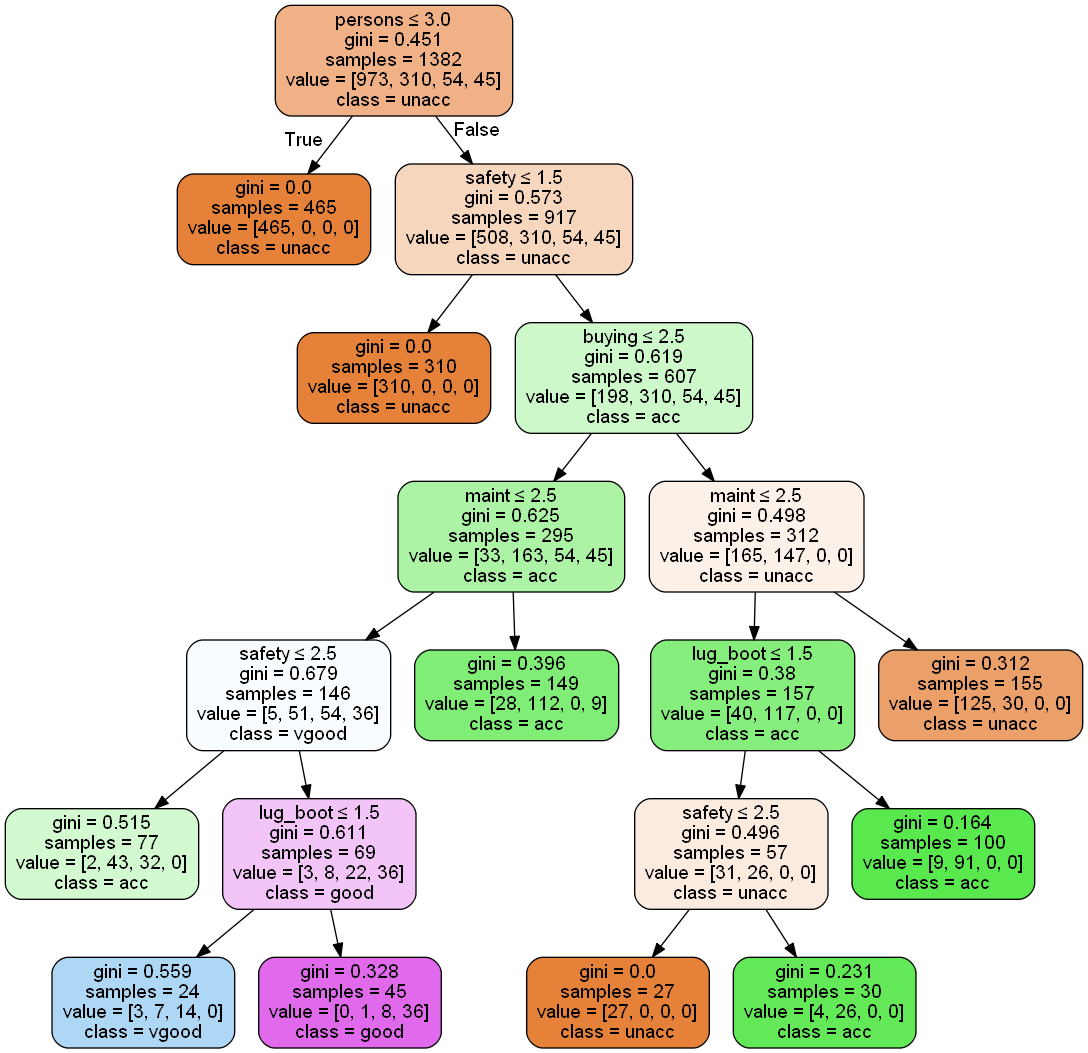

In [16]:
'''
import os
# Here is my computer graphviz environment
os.environ["PATH"] += os.pathsep + 'D:/graphviz/bin/'
import sklearn.tree as tree
import pydotplus
from IPython.display import Image

tree.export_graphviz(clf,out_file="tree.dot"  )



dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=feature_names,
class_names=class_names,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
'''

# need the environment of pydotplus and graphviz

### Use PCA for feature extraction

In [15]:
from sklearn.decomposition import PCA

## For the marked question in our presentation : Why we use PCA for classification?

#### We want to get the 90% features to build this training set, rather than 100%, because we do not know whether there is noise data or not. After testing, we find  we get a lower acc, as shown in the slides, and then we give up using PCA to extract the features first. We simplely use our Adaboost method. 

#### For us, PCA is a method to get better data(although in fact we get bad results). Therefore, no classifiers is uesd in PCA process. 

In [16]:
# get the 90% features first, and then we apply the adaboost method to get a higher acc
pca = PCA(n_components=0.9)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.fit_transform(X_test)

In [17]:
# set parameters for GridSearchCV
param_grid= {'criterion':['gini'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf':[2,3,5,10],
             'max_leaf_nodes':[3,4,5,6,7,8,9,10]
            }

In [18]:
# fit the GridSearchCV with the PCA data
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=6)
grid.fit(pca_X_train,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 

In [19]:
# Get the best parameters with the PCA data. We apply them later in the Adaboost model
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_leaf': 2}


In [20]:
# Create adaboost classifer object

# clf is the decisiontree with the best parameters (data after PCA)
clf = grid.best_estimator_

abc = AdaBoostClassifier(n_estimators=50,
                         base_estimator=clf,
                         learning_rate=1
                        )

# Train Adaboost Classifer
model = abc.fit(pca_X_train,y_train)

#Predict the response for test dataset and train dataset
train_y_pred = model.predict(pca_X_train)
test_y_pred = model.predict(pca_X_test)

In [21]:
# After PCA, the acc of test is worse than before
print("Adaboost with PCA Train Accuracy:", metrics.accuracy_score(y_train, train_y_pred))
print("Adaboost with PCA Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))

Adaboost with PCA Train Accuracy: 0.9746743849493488
Adaboost with PCA Test Accuracy: 0.5


### Multi_Adaboost (Write by ourselves)

In [22]:
def muti_adaboost(train_Y,train_X,test_Y,test_X,M=50):
    # get the number of the classification
    class_num = len(np.unique(train_Y))
    
    # build the arameter dictionar
    param_grid= {'criterion':['gini'],
             'max_depth':[1,2,3,4,5,6],
             'min_samples_leaf':[2,3,5,10],
             'max_leaf_nodes':[3,4,5,6,7,8,9,10]
            }
    # find the best parameters
    grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=6)
    grid.fit(X_train,y_train)
    clf = grid.best_estimator_
    print("Best parameters:")
    print(grid.best_params_)
    
    # calculate the number of  samples in the training set and test set
    train_num = len(train_X)
    test_num = len(test_X)
    # initialize the weight ： 1/N
    w = np.ones(train_num) / train_num
    # store the weight in each iteration
    alpha = []
    # store the results
    train_pred = [[]for i in range(M)]
    test_pred = [[]for i in range(M)]
    # store the final results
    train_final = []
    test_final = []
    for i in range(M):
        # use the weight and fit the model
        clf.fit(train_X, train_Y, sample_weight = w)
        train_pred_i = clf.predict(train_X)
        test_pred_i = clf.predict(test_X)
        # store the results for each iteration
        train_pred[i] = train_pred_i
        test_pred[i] = test_pred_i
        # store the errors. When the prediction is wrong, mark it with 1, itherwise, mark it with 0
        miss_i = [int(x) for x in (train_pred_i != train_Y)]
        # output the accuracy for each iteration
        print("weak_clf_%02d train acc: %.4f"% (i + 1, 1 - sum(miss_i) / train_num))
        
        # calulate the error rate (we take the weight into consideration)
        err_m = np.dot(w,miss_i)
        
        # calculate the aloha for each iteration
        alpha_i = 0.5 * np.log((1 - err_m) / float(err_m))
        alpha.append(alpha_i)
        
        # For a prediction data, when it is correct, its miss_i is 0, and when it is wrong, its miss_i is 1
        # Increasing the proportion of miss_i is 1, so that the next iteration is more inclined to correctly classify the wrong data, so that miss_temp value is still 1
        # If the miss_i is 0, you can reduce its specific gravity appropriately, because it has been classified correctly, so miss_temp value becomes - 1
        miss_temp = [-1 if x==0 else 1 for x in miss_i]
        # w_k1 = w_k0 * exp(alpha_k0*miss_temp) / sum(w_k1)
        w = np.multiply(w, np.exp([float(x) * alpha_i for x in miss_temp]))
        w = w / sum(w)
    
    
    # print(alpha)
    # build  the dictionary for prediction
    train_final_temp = {}
    test_final_temp = {}
    
    # calculate the train
    for i in range(train_num):
        # intilize the dictionary
        for k in np.unique(train_Y):
            train_final_temp[str(k)] = 0
        # calculate the possibility for each category according to the weight
        for j in range(M):
            train_final_temp[str(train_pred[j][i])] += alpha[j]
        # find the most possible category
        max_num = str(np.unique(train_Y)[0])
        for k in train_final_temp:
            if(train_final_temp[max_num] < train_final_temp[k]):
                max_num = k
        # add the category
        train_final.append(int(max_num))
        
        
    
    # calculate the test
    for i in range(test_num):
        for k in np.unique(test_Y):
            test_final_temp[str(k)] = 0
        for j in range(M):
            test_final_temp[str(test_pred[j][i])] += alpha[j]
        max_num = str(np.unique(test_Y)[0])
        for k in test_final_temp:
            if(test_final_temp[max_num] < test_final_temp[k]):
                max_num = k
        test_final.append(int(max_num))
    
    
     
    print("train accuracy: %.4f" % (sum(train_final == train_Y) / train_num))
    print("test accuracy: %.4f" % (sum(test_final == test_Y) / test_num))
    

In [23]:
muti_adaboost(y_train,X_train,y_test,X_test)

Best parameters:
{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 2}
weak_clf_01 train acc: 0.9045
weak_clf_02 train acc: 0.8162
weak_clf_03 train acc: 0.8162
weak_clf_04 train acc: 0.7113
weak_clf_05 train acc: 0.7967
weak_clf_06 train acc: 0.6556
weak_clf_07 train acc: 0.3857
weak_clf_08 train acc: 0.7373
weak_clf_09 train acc: 0.7663
weak_clf_10 train acc: 0.6397
weak_clf_11 train acc: 0.7395
weak_clf_12 train acc: 0.6896
weak_clf_13 train acc: 0.6657
weak_clf_14 train acc: 0.7438
weak_clf_15 train acc: 0.5369
weak_clf_16 train acc: 0.7685
weak_clf_17 train acc: 0.8082
weak_clf_18 train acc: 0.5912
weak_clf_19 train acc: 0.6404
weak_clf_20 train acc: 0.5948
weak_clf_21 train acc: 0.7069
weak_clf_22 train acc: 0.6643
weak_clf_23 train acc: 0.4262
weak_clf_24 train acc: 0.7706
weak_clf_25 train acc: 0.6657
weak_clf_26 train acc: 0.5796
weak_clf_27 train acc: 0.5535
weak_clf_28 train acc: 0.7359
weak_clf_29 train acc: 0.4501
weak_clf_30 train acc: 0.6831
